# Le problème instationnaire de diffusion 1D


## Description du problème

Une plaque mince est portée à une température uniforme de 200°C. 

À instant $t=0$ la température du côté droit de la plaque est soudainement réduite à 0°C. Le coté gauche est quand à lui supposé isolé.

L'équation de conduction thermique transitoire qui correspond au problème 1D peut s'écrire :
$$\rho c_{p}\frac{\partial T}{\partial t}=\frac{\partial}{\partial x}\left(\lambda\frac{\partial T}{\partial x}\right)$$

ou aussi :

$$\frac{\partial T}{\partial t}=\frac{\partial}{\partial x}\left(\Gamma\frac{\partial T}{\partial x}\right)$$

On notera :

- $\Gamma=\frac{\lambda}{\rho c_{p}}\,\left(m^{2}.s^{-1}\right)$ le coefficient de diffusion thermique,
- $\lambda\,\left(W.m^{-1}.K^{-1}\right)$ la conductivité thermique,
- $\rho\,\left(kg.m^{-3}\right)$ la masse volumique,
- $c_{p}\,(J.kg^{-1}.K^{-1})$ la capacité thermique massique.

avec :

- comme condition initiale : $T\left(x,0\right)=200\,\forall x$
- comme conditions aux limites : $\frac{\partial T}{\partial x}\left(0,t\right)=0\,\forall t>0$ et $T\left(L,t\right)=0\,\forall t>0$

**Données :** longueur de la plaque $L=2\text{ cm}$, conductivité thermique $\lambda=10W.m^{-1}.K^{-1}$ et $\rho c_{p}=10\times10^{6}J.m^{-3}.K^{-1}$.


## Resolution numérique


In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def diffusion_unsteady(L, N, Nt, dt, T_init, T_L, gamma):
    """
    Resoud un EDP de diffusion pure instationnaire 1D
    'L': longueur du domaine
    'N': nb de cellules
    'Nt': nb d'iérations temporelles
    'dt': pas de temps
    'T_init': température initiale
    'T_L': température en x = L
    'gamma': coefficient de diffusion
    """
    # Maillage
    dx = L/float(N)                     # Pas d'espace
    x = np.linspace(dx/2, L-dx/2, N)    # Abscisses des centres des cellules

    # Initialisation
    T = np.zeros((N,Nt+1))
    T[:,0] = T_init

    # Calcul de la solution au cours du temps
    for n in range(Nt):
        
        # Pour les cellules intérieures
        for i in range(1, N-1): 
            T[i,n+1] = T[i,n] + (gamma*dt)/(dx**2) * (T[i-1,n] -2*T[i,n] + T[i+1,n] )

        # Cellule frontière 0 - x=0
        T[0,n+1] = (1-(gamma*dt)/(dx**2))*T[0,n]+ (gamma*dt)/(dx**2) * T[1,n]

        # Cellule frontière N-1 - x=L
        T[-1,n+1] = 2*gamma*dt/(dx**2)*T_L + gamma*dt/(dx**2)*T[-2,n] + (1-3*gamma*dt/(dx**2))*T[-1,n]

    return x, T

In [7]:
# Maillage
L = 0.02                    # Longueur du domaine de calcul
N = 5                       # Nb de cellules
dx = L/float(N)                     # Pas d'espace

# Paramètres physique
k = 10          # Conductivité thermique
rho_c = pow(10,7)
gamma = k / rho_c # Coefficient de diffusion thermique

T_init = 200    # Température initiale
T_L = 0         # Température en x=L

t_fin = 500         # Temps final à atteindre
dt = 2              # Pas de temps
Nt = int(t_fin/dt)  # Nombres d'itérations temporelles
dt_max = rho_c*(dx*dx/float(2.0*k))        #  Pas de temps max autorisé pour la stabilité
print ("\n Le pas de temps max pour garantir la stabilité du schéma explicite est : \t" + str(dt_max))


 Le pas de temps max pour garantir la stabilité du schéma explicite est : 	8.0


In [4]:
# Calcul de la solution
x, T = diffusion_unsteady(L,N,Nt,dt,T_init,T_L,gamma)

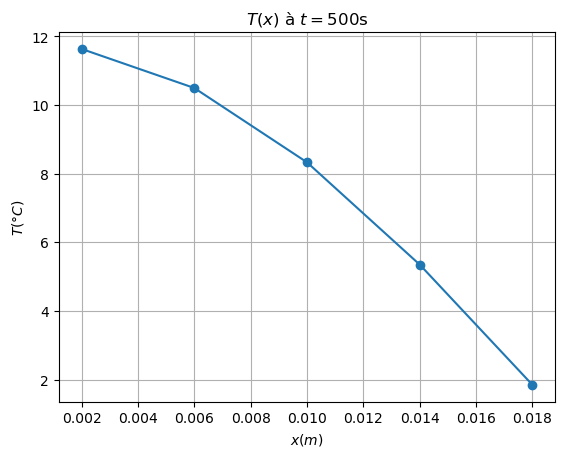

In [5]:
# Affichage de la solution
plt.figure()
plt.plot(x, T[:,Nt], '-o')
plt.xlabel(r"$x(m)$")
plt.ylabel(r"$T(°C)$")
plt.title(r"$T(x)$ à $t=$"+str(Nt*dt)+"s")
plt.grid()
plt.show()

#### Bof pour la présentation des résultats ... :(

Essayons d'utiliser les widgets pour rendre l'analyse de la solution plus ludique, interactive et efficace.


In [ ]:
# Importation du module des widgets
from ipywidgets import interactive

def plot_sol(m=0):
    "Afichage de la solution à une iteration m"
    plt.figure(2)
    plt.plot(x, T[:,m], '-o')
    plt.ylim(0,T_init+5)
    plt.xlabel(r"$x(m)$")
    plt.ylabel(r"$T(°C)$")
    plt.title(r"$T(x)$ à $t=$"+str(m*dt)+"s")
    plt.grid()
    plt.show()

interactive_plot = interactive(plot_sol, m=(0, Nt))
#output = interactive_plot.children[-1]
interactive_plot


interactive(children=(IntSlider(value=0, description='m', max=250), Output()), _dom_classes=('widget-interact'…